In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
# Miguel Jesus Canto Mendez

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [3]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteC6R1VF/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteC6R1VF/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
class_names = metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
num_train_examples = metadata.splits['train'].num_examples #60 mil datos train
num_test_examples = metadata.splits['test'].num_examples #10 mil datos test


In [10]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [12]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


In [13]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

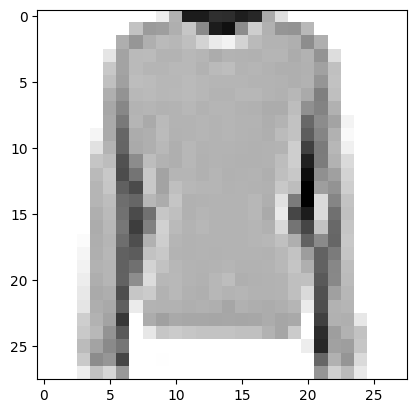

In [16]:
for images, labels in train_dataset.take(5):
  break
images = images.numpy().reshape((28,28))
plt.figure()
plt.imshow(images, cmap = plt.cm.binary)
plt.grid(False)
plt.show()

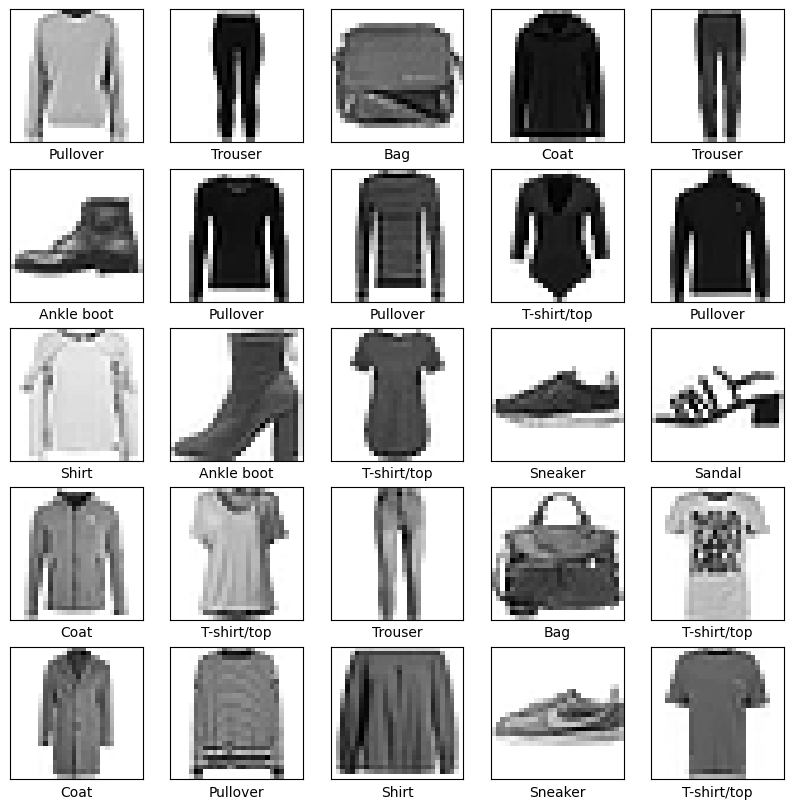

In [18]:
plt.figure(figsize=(10,10))
for i,(images, labels) in enumerate(train_dataset.take(25)):
  images = images.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images, cmap = plt.cm.binary)
  plt.xlabel(class_names[labels])
plt.show()

In [19]:
#Estructura de la red
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #Capa de entrada
  tf.keras.layers.Dense(50, activation=tf.nn.relu), #Capas oculta
  tf.keras.layers.Dense(50, activation=tf.nn.relu), #Capas oculta
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

In [20]:
#Función que compila el modelo
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [21]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [22]:
#Realizar el aprendizaje
model.fit(
  train_dataset, epochs=5,
  steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 14s 2ms/step - loss: 1.0188 - accuracy: 0.6290
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6462 - accuracy: 0.7633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5620 - accuracy: 0.7971
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5338 - accuracy: 0.8105
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4948 - accuracy: 0.8242


In [23]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
test_dataset, steps=math.ceil(num_test_examples/32)
)
#Imprime los resultados de precisión
print("Resultado en las pruebas: ", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.5160 - accuracy: 0.8179
Resultado en las pruebas:  0.8179000020027161


In [24]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


1/1 [==============================] - 0s 90ms/step


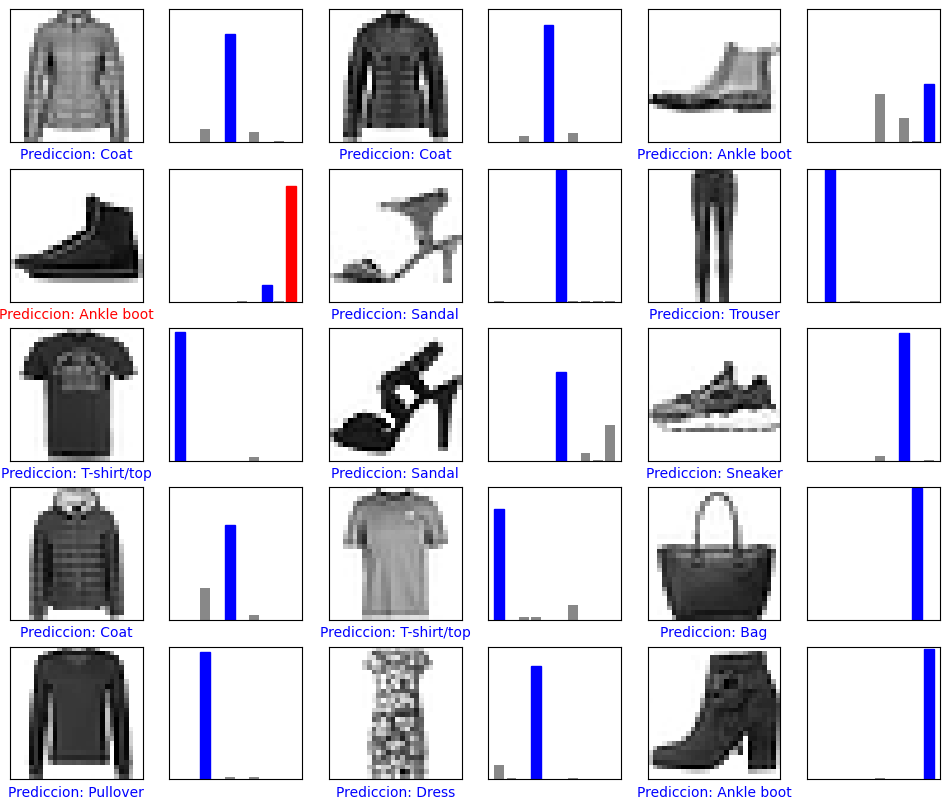

In [25]:
numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()

In [26]:
#Probar una imagen suelta
images = test_images[4]
images = np.array([images])
predictions = model.predict(images)
print("Prediccion: " + class_names[np.argmax(predictions[0])])

1/1 [==============================] - 0s 153ms/step
Prediccion: Sandal
